##  TMNIST Digit Classification with Neural Networks

## Abstract
TMNIST, short for Typeface-based MNIST, is a dataset created as an alternative to the MNIST database for handwritten digits. It features images depicting digits from 0 to 9, generated using 2,990 different Google Fonts files.

### Key Characteristics:
* **Introducing TMNIST (Typeface MNIST)**, a novel dataset challenging character recognition systems beyond handwritten digits.
* **This dataset presents grayscale images of digits (0-9)** rendered in diverse typefaces, simulating real-world typographical variations.
* With over **495,046 images** and a wide range of fonts, TMNIST poses a unique challenge for model robustness and font-agnostic recognition.
- Each row consists of **786 elements:**
  - The **first element** represents **the font name** (e.g., Chivo-Italic, Sen-Bold).
  - The **second element** represents the **label (a digit ranging from 0 to 9).**
  - The **remaining 784 elements** represent **grayscale pixel values** (ranging from 0 to 255) for a **28x28 pixel image.**

## Installing Essential Libraries

In [ ]:
!pip install numpy
!pip install tensorflow
!pip install keras

In [ ]:
import torch

#  Adding Torch functionalities so that it can be used for building CNN Model
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import torch.utils.data as data_utils
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using the GPU...")
else:
    device = torch.device("cpu")
    print("GPU is not available. Using the CPU...")

## Importing Data

In [ ]:
#Reading data into pandas dataframe.

data_sets = "/kaggle/input/tmnist-typeface-mnist/TMNIST_Data.csv"
data = pd.read_csv(data_sets)

In [ ]:
# Displaying first rows of dataset
data.head()

In [ ]:
# Determining Shape and Number of Sample in the Dataset

print(f"The Shape of the Dataframe is: {data.shape}") #Number of Samples, Number of Pixels(Features)
print(f"Number of Samples in the Dataset: {data.shape[0]}")

In [ ]:
data.columns

- `Index(['names', 'labels', '1', '2', '3', ..., '783', '784'], dtype='object')`: This part indicates that the DataFrame `data` has an index with labels `'names'` and `'labels'`, followed by a range of numerical labels from `'1'` to `'784'`, totaling 786 columns.
- `dtype='object'`: This specifies the data type of the index labels, which is `'object'`, indicating that the index labels are strings.
- `length=786`: This shows the total number of columns in the DataFrame, which is 786.

In [ ]:
#Dropping redundant coloums like names and labels from the training frames and keeping only pixel values
X = data.drop(columns = {'names', 'labels'})/255
X = X.values.reshape(X.shape[0], 1, 28, 28)
y = data[['labels']].values.reshape((-1,))

The above code performs the following operations:

1. **Dropping Redundant Columns:** It drops the columns named 'names' and 'labels' from the DataFrame `data`. These columns likely contain non-pixel data and are considered redundant for the purpose of training a model to recognize images. It's using the `drop()` method with the `columns` parameter set to a set containing the column names to be dropped.

2. **Normalization:** After dropping the columns, the remaining pixel values are divided by 255. This step normalizes the pixel values to a range between 0 and 1, which is a common preprocessing step in image data.

3. **Reshaping:** The data is reshaped into a format suitable for input into a Convolutional Neural Network (CNN). Specifically, it reshapes the data into a 4D array with dimensions `(number of samples, channels, height, width)`. Here, `1` denotes that there is a single channel (grayscale), and `28x28` represents the dimensions of each image.

4. **Separating Labels:** Finally, it separates the labels from the modified DataFrame and reshapes them into a 1D array.

In summary, this code **prepares the image data for training a CNN** by **dropping non-pixel columns,** normalizing pixel values, reshaping the data into a suitable format, and separating the labels.

## Creating Training and Test sets

Allocating **80%** of the data for **training** and **20%** for **testing** with a fixed random state for reproducibility.

In [ ]:
#split data into training and testing sets using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Convert X_train, X_test, y_train, and y_test to PyTorch tensors
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

- **Data Conversion:** The code converts the training and testing data from NumPy arrays (`X_train`, `X_test`, `y_train`, `y_test`) into PyTorch tensors.
- **PyTorch Integration:** By converting the data to tensors, it enables seamless integration with PyTorch, facilitating operations such as model training and evaluation using PyTorch's functionalities.
- **Tensor Creation:** PyTorch's `torch.from_numpy()` function is utilized to create tensors from NumPy arrays, ensuring compatibility and efficient handling of data within the PyTorch framework.

In [ ]:
#printing shape
print(X_train.shape, y_train.shape)

- `X_train`: Contains **23,920 samples**, each with dimensions of 1 channel, and images of size 28x28 pixels.
- `y_train`: Contains **23,920 labels**, corresponding to the training samples.

## Showing Examples from data set

In [ ]:
def visualize_images(data1, data2, data3, data4):
    # Create a 2x2 subplot grid
    plt.subplot(221)
    plt.imshow(data1[0], cmap='gray')  # Display the first image
    plt.axis("off")  # Turn off axis display
    plt.subplot(222)
    plt.imshow(data2[0], cmap='gray')  # Display the second image
    plt.axis("off")
    plt.subplot(223)
    plt.imshow(data3[0], cmap='gray')  # Display the third image
    plt.axis("off")
    plt.subplot(224)
    plt.imshow(data4[0], cmap='gray')  # Display the fourth image
    plt.axis("off")
    plt.show()

# Call the visualize_images() function with the first four images in X_train dataset
visualize_images(X_train[6], X_train[5], X_train[4], X_train[3])

In [ ]:
print(type(X_train))
print(type(y_train))

## Dataset Creation
* Two datasets created using PyTorch's TensorDataset module:
    * train 
    * test 
* Combines input features (`X_train`, `X_test`) and labels (`y_train`, `y_test`).

In [ ]:
# Create a training dataset from X_train and y_train
train = data_utils.TensorDataset(X_train, y_train)
# Create a testing dataset from X_test and y_test
test = data_utils.TensorDataset(X_test, y_test)

In [ ]:
# Create a training data loader from the train dataset
# with a batch size of 128 and shuffling the data
train_loader = data_utils.DataLoader(train, batch_size=128, shuffle=True)

# Create a testing data loader from the test dataset
# with a batch size of 128 and shuffling the data
test_loader = data_utils.DataLoader(test, batch_size=128, shuffle=True)

In [ ]:
#Printing input size of an iteration of training
for images, labels in train_loader:
    print(images.shape, labels.shape)

data_iter = iter(train_loader)
images, labels = next(data_iter)
print(images.shape, labels.shape)

#### Printing the input size during training serves :
- **Debugging and Validation:**
  - Verifies data loader functionality.
  - Identifies data loading errors or incorrect dimensions.

- **Understanding Data Structure:**
  - Provides insights into input data dimensions.
  - Helps design neural network architecture and configure input layer.

- **Batch Size Check:**
  - Confirms correct application of specified batch size.
  - Ensures consistency across batches.

- **Monitoring Training Progress:**
  - Indicates efficiency and progress of training process.
  - Ensures smooth operation of data loader.

In [ ]:
# Checking the size of the batch and labels from the training data loader
for images, labels in train_loader:
    print("Batch size (images):", images.shape)
    print("Batch size (labels):", labels.shape)
    break  # After printing the first batch, we break out of the loop

# Alternatively, we can directly fetch one batch from the data loader
data_iter = iter(train_loader)
images, labels = next(data_iter)
print("Directly fetched batch - images:", images.shape)
print("Directly fetched batch - labels:", labels.shape)

The **output indicates** the sizes of batches and labels obtained from the **training data loader**:

- **Iterating Through DataLoader:**
  - The shape of the images in each batch is `(128, 1, 28, 28)`, denoting that each batch contains 128 samples, each with 1 channel, and images of size 28x28 pixels.
  - The shape of the labels in each batch is `(128)`, indicating that each batch contains 128 labels corresponding to the samples in the batch.
  
- **Directly Fetching One Batch:**
  - The shape of the images in the fetched batch is identical to that obtained through iteration, i.e., `(128, 1, 28, 28)`.
  - Similarly, the shape of the labels in the fetched batch is `(128)`, consistent with the label sizes obtained through iteration.

## Build the neural network
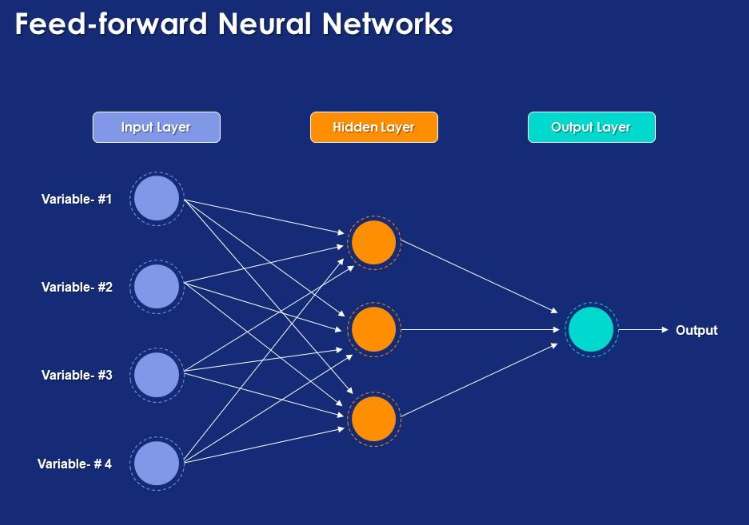

 #### Feed-Forward Neural Network with one hidden layer. 

**Here’s a breakdown of the image:**

* **Layers:** The neural network is depicted as having three layers: an input layer, a hidden layer, and an output layer.
    * **Input layer:** The input layer is the first layer in a neural network. It receives the initial data that the network will process. In the image, there are four input variables labeled "Variable-#1" to "Variable-#4".
    * **Hidden layer:** The hidden layer is where most of the computation in a neural network happens. It’s made up of interconnected nodes, or artificial neurons, that process the data from the input layer. The number of neurons in the hidden layer can affect the complexity of the functions the network can learn. The image depicts a single hidden layer with an unspecified number of neurons.
    * **Output layer:** The output layer is the final layer in a neural network. It provides the results of the network’s computations. The image shows a single output layer labeled “Output”.

* **Data flow:** Data flows through the network from the input layer, through the hidden layer, to the output layer. The connections between the layers are weighted, and these weights are what the network learns during training.

* **Learning:** In a feed-forward neural network, the weights are adjusted based on the difference between the network's output and the desired output. This process is called backpropagation. By iteratively adjusting the weights, the network can learn to map inputs to outputs.


## Defining Convolutional Neural Network(CNN) Architecture

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)     # First convolutional layer with input channels=1, output channels=32, and kernel size=3x3
        self.conv2 = nn.Conv2d(32, 64, 3)    # Second convolutional layer with input channels=32, output channels=64, and kernel size=3x3
        self.pool = nn.MaxPool2d(2, 2)       # Max pooling layer with kernel size=2x2 and stride=2
        self.fc1 = nn.Linear(64 * 12 * 12, 128)  # Fully connected layer with input size of 64x12x12 (output from previous layers) and output size of 128
        self.fc2 = nn.Linear(128, 10)        # Fully connected layer with input size of 128 and output size of 10 (for 10 classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))            # Apply ReLU activation to the output of the first convolutional layer
        x = self.pool(F.relu(self.conv2(x))) # Apply ReLU activation to the output of the second convolutional layer, then perform max pooling
        x = x.view(-1, 64 * 12 * 12)         # Flatten the tensor to a 1D vector
        x = F.relu(self.fc1(x))              # Apply ReLU activation to the output of the first fully connected layer
        x = self.fc2(x)                      # Output from the second fully connected layer (logits)
        return x

net = Net()                               # Create an instance of the neural network model
net.to(device)                           # Move the model to the specified device (e.g., GPU or CPU)



#### Explaination of the above step:
1. **Initialization (`__init__`):**
   - Neural network architecture is initialized with convolutional and fully connected layers.

2. **Forward Pass (`forward`):**
   - Forward pass defines computations applied to input data through convolutional and fully connected layers.

3. **Instance Creation (`net = Net()`):**
   - An instance of the neural network model is created.

4. **Device Placement (`net.to(device)`):**
   - The model is moved to the specified device (e.g., GPU or CPU) for computation.

## Training Neural Network

In [ ]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
optimizer = optim.Adam(net.parameters(), lr = 0.001)

**criterion = nn.CrossEntropyLoss():** It defines the loss function used for training the neural network. `CrossEntropyLoss` is commonly used for multi-class classification tasks.

In [ ]:
net = net.float()


**optimizer = optim.Adam(net.parameters(), lr=0.001):** It initializes the optimizer used to update the model's parameters during training. Here, `Adam` optimizer is employed with a learning rate of `0.001`.

**net = net.float():** It converts the data type of the neural network model (`net`) and its parameters to float. This is often necessary for compatibility reasons.

In [ ]:
epoch_num = 0
actual_loss = 0.0
accuracy = 0.0

**epoch_num = 0, actual_loss = 0.0, accuracy = 0.0:** - These lines initialize variables to track training progress, including the current epoch number, the actual loss during training, and the accuracy of the model.

## Tracking Performance Metrics

In [ ]:
#training model with 30 epochs

num_epochs = 30

# Create lists to store epoch number, loss, and accuracy for each epoch
epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(num_epochs):
    print(f'Starting Epoch: {epoch + 1}...')

    running_loss = 0.0   # Initialize running loss to 0 for each epoch

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)    # Move inputs to the specified device (e.g., GPU or CPU)
        labels = labels.to(device)    # Move labels to the specified device

        optimizer.zero_grad()        # Zero the gradients of the optimizer

        outputs = net(inputs.float())   # Forward pass to get predicted outputs from the model
        loss = criterion(outputs,labels)  # Compute the loss between predicted outputs and ground truth labels
        loss.backward()                 # Backward pass to compute gradients
        optimizer.step()                # Update model weights using the optimizer

        running_loss += loss.item()   # Add the current batch loss to the running loss for this epoch
        if i % 50 == 49:
            correct = 0
            total = 0
            
            with torch.no_grad():
                for data in test_loader:
                    images, labels = data
                    images = images.to(device)    # Move images to the specified device
                    labels = labels.to(device)    # Move labels to the specified device
                    outputs = net(images.float())  # Forward pass to get predicted outputs from the model
                    
                    _, predicted = torch.max(outputs.data, dim = 1)   # Get predicted labels with maximum probability
                    total += labels.size(0)   # Update total number of images
                    correct += (predicted == labels).sum().item()   # Update correct predictions count
                
                accuracy = 100 * correct / total   # Calculate accuracy for this epoch
                actual_loss = running_loss / 50   # Calculate average loss for this epoch
                epoch_num = epoch + 1   # Get current epoch number
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i + 1)}, Loss: {actual_loss:.3f}, Test Accuracy: {accuracy:.3f}%')
                
    epoch_log.append(epoch_num)   # Append epoch number to the epoch log
    loss_log.append(actual_loss)   # Append average loss to the loss log
    accuracy_log.append(accuracy)   # Append accuracy to the accuracy log


print('Training Completed.')

- **Performance Summary:**
  - **Epochs 1-5:** Gradual improvement in test accuracy from **94.03%** to **99.05%** with decreasing loss from **0.662** to **0.051**.
  - **Epochs 6-10:** Test accuracy stabilizes around **99.01% - 99.11%** with loss ranging from **0.014** to **0.020**.
  - **Epochs 11-15:** Accuracy fluctuates slightly around **99.00%** with loss decreasing to **0.009**.
  - **Epochs 16-20:** Test accuracy consistently around **99.16% - 99.30%** with low loss values (**0.004 - 0.016**).
  - **Epochs 21-25:** Accuracy remains high, ranging from **99.09%** to **99.28%**, with minimal loss (**0.001 - 0.007**).
  - **Epochs 26-30:** Test accuracy maintains above **99.20%** with loss almost negligible (below **0.002**).

- **Overall Training:** High and stable test accuracy achieved with minimal loss, indicating **successful training of the model.**

In [ ]:
PATH = './cnn_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
net = Net()
net.to(device)
net.load_state_dict(torch.load(PATH))

## Evaluating the model

In [ ]:
correct = 0   # Initialize count of correct predictions to 0
total = 0     # Initialize count of total predictions to 0

with torch.no_grad():   # Disable gradient computation for efficiency
    for data in test_loader:   # Loop through the test dataset
        images, labels = data   # Get images and labels from the test dataset
        images = images.to(device)   # Move images to the specified device (e.g., GPU or CPU)
        labels = labels.to(device)   # Move labels to the specified device
        outputs = net(images.float())   # Forward pass to get predicted outputs from the model
        _, predicted = torch.max(outputs.data, 1)   # Get predicted labels with maximum probability
        label_size = labels.size(0)   # Get the number of labels in the current batch
        total += label_size   # Update total count of predictions
        correct += (predicted == labels).sum().item()   # Update count of correct predictions by summing up correct predictions in the current batch

accuracy = 100 * correct / total   # Calculate accuracy by dividing correct predictions by total predictions and multiplying by 100 to get percentage

print(f'Accuracy of the network on test images: {accuracy:.3}%')

## Visualizing the model performance:

In [ ]:
net.eval()   # Set the model to evaluation mode, which disables dropout and batch normalization

num_images = 5  # Number of images to visualize

with torch.no_grad():   # Disable gradient computation for efficiency
    for data in test_loader:   # Loop through the test dataset
        images, labels = data   # Get images and labels from the test dataset
        images = images.to(device)   # Move images to the specified device (e.g., GPU or CPU)
        labels = labels.to(device)   # Move labels to the specified device

        outputs = net(images.float())   # Forward pass to get predicted outputs from the model
        predictions = torch.argmax(outputs, dim=1)   # Get predicted labels with maximum probability

        for i in range(data[0].shape[0]):   # Loop through the images in the current batch
            pred = predictions[i].item()   # Get the predicted label for the current image
            label = labels[i]   # Get the actual label for the current image
            if(num_images > 0):   # Check if the number of images to visualize is greater than 0
                print(f'Actual Label: {pred}, Predicted Label: {label}')   # Print the actual and predicted label for the current image
                img = np.reshape(images[i].cpu().numpy(),[1,28,28])   # Convert the image tensor to a NumPy array and reshape it to [1, 28, 28] size
                visualize_image(img)   # Visualize the image using a custom function (e.g., visualize_image)
                num_images -= 1   # Decrement the number of images to visualize by 1

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training loss
plt.figure(figsize=(12, 6))
plt.plot(epoch_log, loss_log, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()

# Plotting the training accuracy
plt.figure(figsize=(12, 6))
plt.plot(epoch_log, accuracy_log, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Time')
plt.legend()
plt.show()

**Interpreting the Graphs:**

- **Training Loss:**
   - Ideally, it should decrease over time, indicating that the model is learning and minimizing its errors.
   - Rapid initial decline, followed by a plateau, is common.
   - Monitor for sudden increases, which might signal overfitting.
- **Training Accuracy:**
   - Should generally increase as training progresses.
   - A plateau or slight decrease might occur towards the end, suggesting model convergence.
   - Be cautious of continued, rapid increases, which could indicate overfitting.

 **Here's evaluation of the graph:**

**Key Considerations:**

- **Epoch Number:** The number of epochs plotted influences graph patterns.
- **Loss Function:** The type of loss function used (e.g., mean squared error, categorical cross-entropy) affects loss values and visual interpretation.
- **Dataset:** The complexity and size of the dataset can impact learning speed and graph shapes.
- **Model Architecture:** The model's structure and hyperparameters play a role in convergence and learning patterns.


### Evaluation:

- **Positive Learning Trend:** The elbow-shaped curve, starting high and decreasing, indicates effective model learning.
- **Potential for Further Improvement:** The lack of a clear plateau suggests possible benefits from additional training epochs, especially within the first 20 epochs where the decline is steeper.
- **Caution Against Overfitting:** Monitor for signs of overfitting (increasing loss on a validation set) if training is extended.

## Performance Assessment:

"The **model is learning successfully,** but potentially has **slight** room for further improvement with more training."

## Confusion Matrix:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
pred_list = torch.zeros(0, dtype=torch.long, device='cpu')   # Create an empty tensor to store predicted labels with dtype long and device CPU
label_list = torch.zeros(0, dtype=torch.long, device='cpu')   # Create an empty tensor to store actual labels with dtype long and device CPU

with torch.no_grad():   # Turn off gradient computation during inference
    for i, (inputs, classes) in enumerate(test_loader):   # Iterate over the test data loader
        inputs = inputs.to(device)   # Move inputs to the specified device (e.g., CPU or GPU)
        classes = classes.to(device)   # Move actual labels to the specified device
        outputs = net(inputs.float())   # Pass inputs through the network to get predicted outputs
        _, preds = torch.max(outputs, 1)   # Get the predicted labels by finding the indices of maximum values along the second dimension (class probabilities)

        pred_list = torch.cat([pred_list, preds.view(-1).cpu()])   # Concatenate predicted labels to the pred_list tensor, reshaping to 1D and moving to CPU
        label_list = torch.cat([label_list, classes.view(-1).cpu()])   # Concatenate actual labels to the label_list tensor, reshaping to 1D and moving to CPU
        
conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())   # Compute the confusion matrix using predicted and actual labels converted to NumPy arrays
class_names = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)   # Define the class names as a tuple of integers from 0 to 9
dataframe = pd.DataFrame(conf_mat, index=class_names, columns=class_names)   # Create a DataFrame from the confusion matrix, with class names as row and column indices
#plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dataframe, annot=True, cbar=None,cmap="rocket",fmt="d")
 
plt.title("Confusion Matrix"), plt.tight_layout()
 
plt.ylabel("True Class"), 
plt.xlabel("Predicted Class")
plt.show()

**Key Insights from the Confusion Matrix:**

- **Strong Overall Performance:** The model achieved a high rate of correct classifications, as evidenced by the predominantly high values along the main diagonal of the matrix. This indicates that it generally distinguishes well between the different classes.
- **Class-Specific Accuracy:**
    - It correctly identified examples with label 0 in 586 out of 589 cases (approximately 99.5%).
    - For label 1, it achieved 564 correct predictions out of 575 (approximately 98.1%).
- **Most Common Misclassification:** The model's primary challenge arises when distinguishing between classes 8 and 3, misclassifying 8 as 3 in 4 instances.
- **Additional Misclassifications:** It also occasionally confused classes 6 and 0, with 3 instances of 6 being misclassified as 0.

**Actionable Insights:**

- **Potential Data Quality Issues:** Investigate the specific examples where misclassifications occurred to identify any underlying patterns or inconsistencies in the data.
- **Improved Class Separation:** Explore model adjustments or feature engineering to enhance distinguishing features for classes 8 and 3, as well as classes 6 and 0.
- **Class Imbalance Mitigation:** If certain classes have significantly fewer examples in the dataset, consider strategies like oversampling or weighted loss functions to address potential biases.


## Takeaways:

- **Data Preparation:** 
    - The dataset is preprocessed by dropping redundant columns like font names and labels, and the pixel values are normalized to a range of *[0, 9]*. The feature columns are reshaped to represent images in the format expected by the neural network.

- **Model Architecture:** 
    - A **convolutional neural network (*CNN*) model** is constructed using **PyTorch's `nn.Module` class**. It comprises two convolutional layers followed by max-pooling, two fully connected layers, and ReLU activation functions. The model is designed to classify images of handwritten digits from the MNIST dataset into one of the ten possible classes.

- **Training:** 
    - The **Adam optimizer** is utilized with a learning rate of *0.001* to minimize the cross-entropy loss during training. The **model is trained over *30 epochs*,** and the training data is split into **mini-batches of size *150*.** Training progress is monitored by evaluating the model's performance on the test dataset periodically.

- **Evaluation:** 
    - The model's performance is evaluated using the test dataset after training completion. The accuracy achieved on the test dataset is monitored to assess the model's generalization ability.

- **Visualization:** 
    - Functions are defined to visualize the training progress by plotting the loss and accuracy metrics across epochs. Additionally, a function is created to visualize the predictions made by the trained model on the test dataset.

## References:
* https://www.kaggle.com/code/gayatrikenkare19/info-6105-gayatri-002743776-tmnist#Takeaways
* https://www.kaggle.com/code/shreyapmaher/neural-network-type-classification-tmnist
* https://www.youtube.com/watch?v=iwoLAj-SZ80

## Licensing

Copyright 2023 Vismay Premnath Devjee

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.